In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import HTML

"""
Source: http://archive.ics.uci.edu/ml/datasets/Iris
Note: Same dataset was given as part of IT402 Soft Computing Lab
"""
data = pd.read_csv("iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"], header=None)

print(data)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
# FREQUENCY DISTRIBUTION

freq_dist = dict.fromkeys(data["class"].unique(), 0)
for a in range(len(data["class"])):
    freq_dist[data["class"][a]] += 1
    
for class_name in data["class"].unique():
    print(class_name + ":", freq_dist[class_name])

Iris-setosa: 50
Iris-versicolor: 50
Iris-virginica: 50


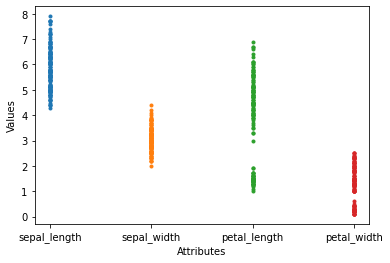

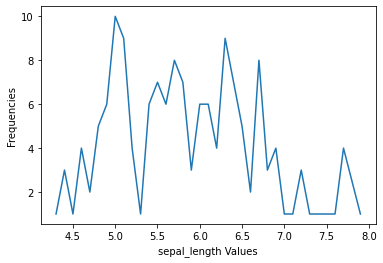

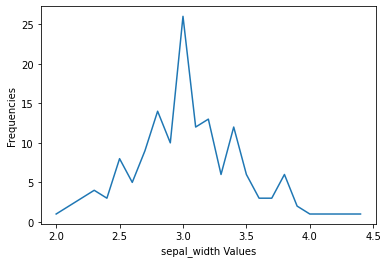

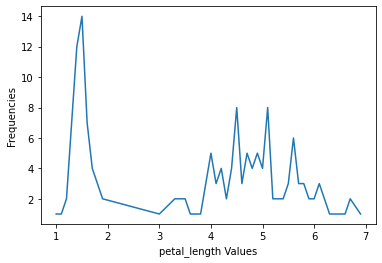

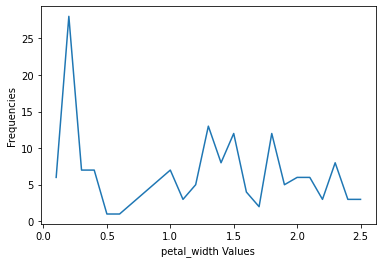

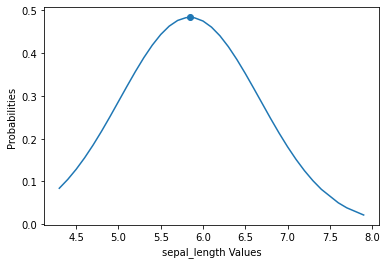

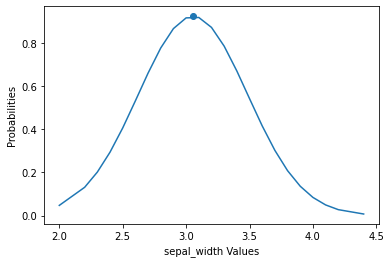

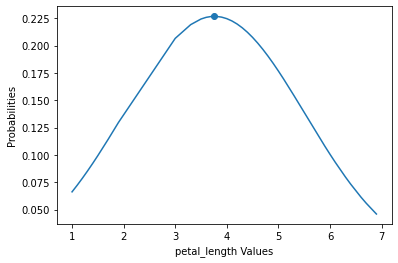

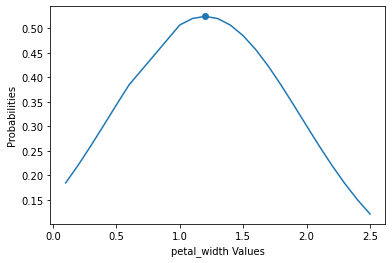

In [227]:
# GRAPHICAL REPRESENTATIONS

# Frequency Distributions
for a in range(len(data.columns[:4])):
    plt.plot(len(data[data.columns[:4][a]]) * [a], data[data.columns[:4][a]], ".")
plt.ylabel("Values")
plt.xlabel("Attributes")
plt.xticks([0, 1, 2, 3], data.columns[:4])
plt.show()

for attribute in data.columns[:4]:
    freq_dist = dict.fromkeys(data[attribute].unique(), 0)
    for a in range(len(data[attribute])):
        freq_dist[data[attribute][a]] += 1
    x = sorted(data[attribute].unique())
    y = [freq_dist[val] for val in x]
    plt.plot(x, y)
    plt.ylabel("Frequencies")
    plt.xlabel(attribute + " Values")
    plt.show()

# Normal Distributions
for attribute in data.columns[:4]:
    arr = sorted(data[attribute])
    mean = np.mean(arr)
    std = np.std(arr)
    pdf = stats.norm.pdf(arr, mean, std)
    plt.plot(arr, pdf)
    plt.scatter(mean, stats.norm.pdf(mean, mean, std))
    plt.ylabel("Probabilities")
    plt.xlabel(attribute + " Values")
    plt.show()

In [3]:
# SUMMARY STATS: Central Tendency Measures

CT_data = pd.DataFrame(data.columns[:4], columns=["class"])
CT_data["Arithmetic Mean"] = [data[column].mean() for column in data.columns[:4]]
CT_data["Mode"] = [data.mode().iloc[0][:4][column] for column in data.columns[:4]]
CT_data["Lower Quartile"] = [data[column].quantile(0.25) for column in data.columns[:4]]
CT_data["Median"] = [data[column].median() for column in data.columns[:4]]
CT_data["Upper Quartile"] = [data[column].quantile(0.75) for column in data.columns[:4]]
HTML(CT_data.to_html(index=False))

class,Arithmetic Mean,Mode,Lower Quartile,Median,Upper Quartile
sepal_length,5.843333,5.0,5.1,5.80,6.4
sepal_width,3.054000,3.0,2.8,3.00,3.3
petal_length,3.758667,1.5,1.6,4.35,5.1
petal_width,1.198667,0.2,0.3,1.30,1.8


In [4]:
# SUMMARY STATS: Dispersion Measures

D_data = pd.DataFrame(data.columns[:4], columns=["class"])
D_data["Minimum"] = [data[column].min() for column in data.columns[:4]]
D_data["Maximum"] = [data[column].max() for column in data.columns[:4]]
D_data["Standard Deviation"] = [data[column].std() for column in data.columns[:4]]
D_data["Variance"] = [data[column].std() ** 2 for column in data.columns[:4]]
HTML(D_data.to_html(index=False))

class,Minimum,Maximum,Standard Deviation,Variance
sepal_length,4.3,7.9,0.828066,0.685694
sepal_width,2.0,4.4,0.433594,0.188004
petal_length,1.0,6.9,1.764420,3.113179
petal_width,0.1,2.5,0.763161,0.582414


In [5]:
# ANALYSIS

"""
Sepal Length:
This data has a few outliers (Larger) and is very slightly skewed to the left

Sepal Width:
This data is similar in shape to a perfectly unskewed distribution but has a few outliers (Smaller and Larger)

Petal Length:
This data has very few outliers (Smaller) and is similar in shape to a perfectly unskewed distribution

Petal Width:
This data has very few outliers (Smaller) and is similar in shape to a perfectly unskewed distribution
"""

'\nSepal Length:\nThis data has a few outliers (Larger) and is very slightly skewed to the left\n\nSepal Width:\nThis data is similar in shape to a perfectly unskewed distribution but has a few outliers (Smaller and Larger)\n\nPetal Length:\nThis data has very few outliers (Smaller) and is similar in shape to a perfectly unskewed distribution\n\nPetal Width:\nThis data has very few outliers (Smaller) and is similar in shape to a perfectly unskewed distribution\n'